<a href="https://colab.research.google.com/github/drdww/OPIM5641/blob/main/Module1/5_Boston_General_EDA_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BostonHousing: General EDA Template
-------------------------------------
**OPIM 5641: Business Decision Modeling - University of Connecticut**

Try to fill in the blanks for memory everyday (type it, don't just copy/paste so that your fingers get used to the syntax!)

You may not need to use all of these codes everytime, but you will use all of these often as your wrangle data.

## Import modules, mount your Google Drive, read data
Set up your environment

In [ ]:
# import modules
import pandas as pd # for data analysis
import numpy as np # for numeric functions
import matplotlib.pyplot as plt # for plotting

In [ ]:
# # mount your google drive
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# read data from drive
# on the lefthand side, navigate to your data and copy the path
# df = pd.read_csv("/content/drive/My Drive/Fall 2020 Materials/Prep/Module1_PythonDataAnalysis/1_WelcomeToPythonPt1/Data/Boston Housing.csv")

# read data from github
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

In [ ]:
# show first few rows
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Head, shape, column names, data types, missing values
See what you're working with - any missing values? Wrong data types? Strange values?

If there are missing values, you can a) delete or b) impute (constant value like 0 or -999, mean or median of column, forward fill, backfill, interpolate, etc.)

In [ ]:
# head
df.head(n=7)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [ ]:
# shape
df.shape # rows, columns

(506, 14)

In [ ]:
# column names
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [ ]:
# data types
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [ ]:
# missing values in entire dataframe
# link: https://thispointer.com/python-pandas-count-number-of-nan-or-missing-values-in-dataframe-also-row-column-wise/
df.isnull().sum().sum()

0

In [ ]:
# missing values by column
# link: https://thispointer.com/python-pandas-count-number-of-nan-or-missing-values-in-dataframe-also-row-column-wise/
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [ ]:
# df.info() is the one stop shop for inspecting a data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## Statistics, percentiles
Get some more granularity on numeric columns. Any strange values? Any 'logical' variables hiding as numerics?

In [ ]:
# describe() gives summary statistics
df.describe()

# it looks like 'chas' is hiding as a float, we will ignore that for now (min=0, max=1)
# 'chas' is a logical/indicator/binary/flag/dummy variable for "Near Charles River"

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# calculate more detailed percentiles or stats on your own
# let's focus on the target variable 'medv'

# mean
print("This is the mean: ")
df['medv'].mean() # in this case we are using the mean() function from pandas, but we don't need to say pd.df['medv'].mean(),
                  # since it is already a dataframe, you can use ALL the pandas functionality

This is the mean: 


22.532806324110698

In [ ]:
# mean rounded to two decimal points
print("This is the mean rounded to two decimal points: ")
np.round(df['medv'].mean(),2) # we can use a round() function, just like in Excel

This is the mean rounded to two decimal points: 


22.53

In [ ]:
# median
print("This is the median: ") # print statements don't matter, but they make the output look nice
df['medv'].median() # this is the median function from pandas, but we don't say pd.df['medv'].median(),
                    # because it is already a dataframe, so you can use ALL of the pandas functionality

This is the median: 


21.2

In [ ]:
# mode
# sometimes in a numeric column, there might not be an interesting mode
print("This is the mode:")
df['medv'].mode() # 50 is the mode! Interesting... will be interesting to visualize what this distribution looks like

This is the mode:


0    50.0
dtype: float64

In [ ]:
# percentiles
# link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html
print("Here is the 10th percentile, which means 10% of the data lies below this value:")
df['medv'].quantile(0.1)

Here is the 10th percentile, which means 10% of the data lies below this value:


12.75

In [ ]:
# let's look at the 10, 25, 50, 75, 90 percentiles
print("Here is the 10th percentile, which means 10% of the data lies below this value:")
df['medv'].quantile([0.1, 0.25, 0.5, 0.75, 0.9])

# notice how we entered the values as a list inside the function (square brackets [])
# check your work! scroll back up to describe and look at if the values line up (like 25, 50 and 75)

Here is the 10th percentile, which means 10% of the data lies below this value:


0.10    12.750
0.25    17.025
0.50    21.200
0.75    25.000
0.90    34.800
Name: medv, dtype: float64

## Flag variables
Convert some variables to 0 or 1 to help subset, explore trends

In [ ]:
# make a new column to recode the target variable 'medv' to a 0 or 1
# 0 if less than or equal to the mean
# 1 if greater than the mean

# one line of code! we made a new column and populated it
df['FLAG_medv'] = np.where(df['medv'] <= np.mean(df['medv']), 0, 1)

# check your work!
print('The mean of medv is:', df['medv'].mean())
df.head()

The mean of medv is: 22.532806324110698


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,FLAG_medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


## Subsetting rows and columns
Sometimes data has extra columns you're not interested in... drop them! Other times you may want to focus on just a subset of data.

In [ ]:
# subset all rows where FLAG_medv = 0, we'll call this 'lowData'
lowData = df[df['FLAG_medv'] == 0]
print(lowData.shape) # make sure you got something... at least some rows... not empty...
                      # if you want to print two things in one cell, the first needs a print statement
                      
lowData.head() # check your work

(297, 15)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,FLAG_medv
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,0
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,0
10,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0,0
11,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9,0


In [ ]:
# subset all rows where FLAG_medv = 0, we'll call this 'lowData'
# copy and paste the text above and reuse
highData = df[df['FLAG_medv'] == 1]
print(highData.shape) # make sure you got something... at least some rows... not empty...
                      # if you want to print two things in one cell, the first needs a print statement
                      
highData.head() # check your work

(209, 15)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,FLAG_medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,1


In [ ]:
# do the number of rows in lowData and highData equal the original rows?
tmpRows = lowData.shape[0] + highData.shape[0]
tmpRows

506

In [ ]:
# a logical statement
tmpRows == df.shape[0] # TRUE! it worked

True

## Group By (pivot tables)
Count, min, max, mean, standard deviation

In [ ]:
# link: https://stackoverflow.com/questions/33575587/pandas-dataframe-how-to-apply-describe-to-each-group-and-add-to-new-columns
df.groupby('FLAG_medv').describe() #ONE LINE OF CODE! Too easy.
# now we can compare the attributes of all the numeric variables
# recall that describe() is only useful for numeric variables

crim                                ...  medv                  
           count      mean        std      min  ...   25%   50%   75%   max
FLAG_medv                                       ...                        
0          297.0  5.563153  10.668584  0.01096  ...  13.9  18.0  20.3  22.5
1          209.0  0.842998   2.125546  0.00632  ...  24.0  27.9  34.6  50.0

[2 rows x 112 columns]

## Correlation
Explore the relationship between numeric variables

In [ ]:
# link: https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas

df.corr()

#plt.matshow(df.corr())
#plt.show()

# this is OK... but there's no legend and no interesting labels...
# keep scrolling the article and you will find the sns plot (seaborn)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,FLAG_medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.270464
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.346689
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.465536
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.087687
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.409177
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.531995
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.442344
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.272031
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.316916
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.403174


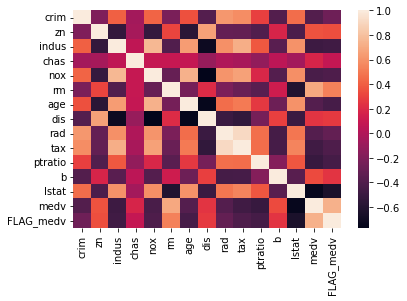

In [ ]:
# pretty! we haven't used seaborn yet, but it is certainly a nice library
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

# notice perfect correlation along the diagonal (as expected)
# it's most interesting to look at correlation among predictors, and with the target

## Univariate Plots
Boxplots, kernel density plots, histograms

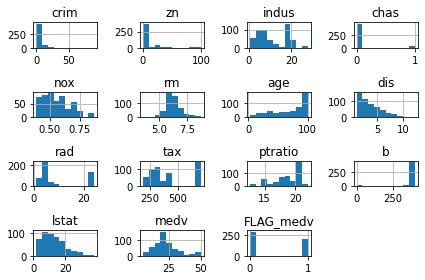

In [ ]:
# show histograms of ALL variables
# histograms allow you to see the shape of the distribution... binned data...
df.hist() # this makes the histogram plot
plt.tight_layout() # space stuff out nicely (what happens without this?)
plt.show()

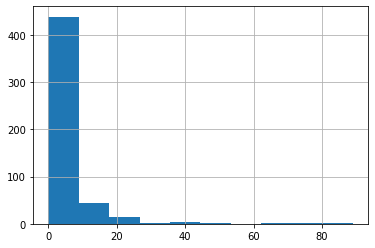

In [ ]:
# make a histogram of one variable
df['crim'].hist()
plt.show()

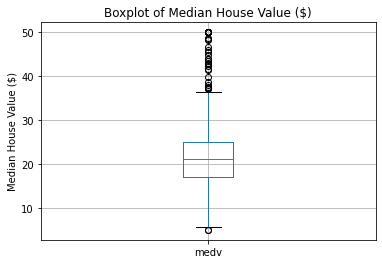

In [ ]:
# boxplots
df.boxplot('medv') # grab the dataframe then select the 'medv' column
plt.ylabel('Median House Value ($)')
plt.title("Boxplot of Median House Value ($)")
plt.show()

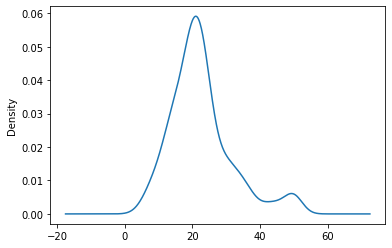

In [ ]:
df['medv'].plot.density() # notice the difference in syntax! where does medv go?
plt.show()                # grab the column of interest then make a plot

## Bivariate Plots
Scatterplots

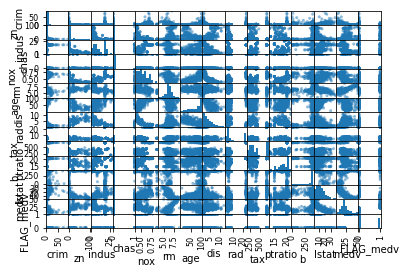

In [ ]:
# scatterplot of all variables
# this is known as a 'pair plot'
# google scaterplot matrix pandas and you will find this:
# link: https://www.marsja.se/pandas-scatter-matrix-pair-plot/
pd.plotting.scatter_matrix(df) # ONE LINE OF CODE!
plt.show() # add this to get rid of the nasty text...

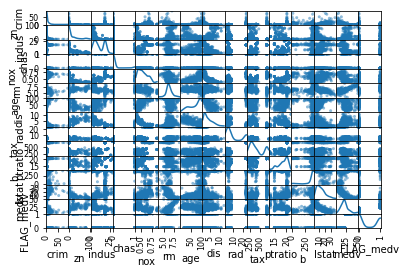

In [ ]:
# here's another one
pd.plotting.scatter_matrix(df, diagonal='kde') #kde means 'kernel density estimate'
plt.show() # get's a little hard to see with MANY variables

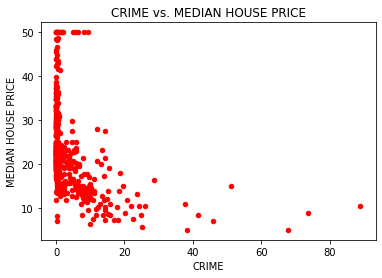

In [ ]:
# here's an easy plot of x = crim and y = medv
df.plot.scatter(x='crim', y='medv', color='red') # notice you just need the names of the columns
plt.xlabel("CRIME")
plt.ylabel("MEDIAN HOUSE PRICE")
plt.title("CRIME vs. MEDIAN HOUSE PRICE")
plt.show()

# every plot you make should have sensible labels and titles! NO EXCUSE!

# you can get fancy and add a smoother...
# link: https://stackoverflow.com/questions/23784399/how-to-visualize-a-nonlinear-relationship-in-a-scatter-plot

In [ ]:
# # let's make a directory called "Results" and save a plot there
# # link: https://stackoverflow.com/questions/54172874/making-two-new-directory-in-google-colab-and-join-them
# import tensorflow as tf

# #Create a new directory (a folder) in your Drive
# resultDir = '/content/drive/My Drive/Fall 2020 Materials/Prep/Module1_PythonDataAnalysis/1_WelcomeToPythonPt1/Results/'
# tf.io.gfile.mkdir(resultDir) # go and check your Google Drive and see if it made it!

Text(0.5, 1.0, 'CRIME vs. MEDIAN HOUSE PRICE')

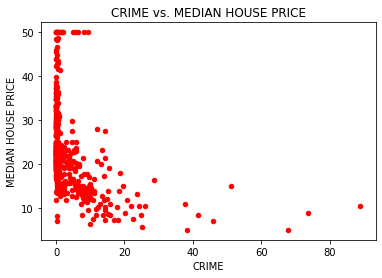

In [ ]:
# try to save that file
df.plot.scatter(x='crim', y='medv', color='red') # notice you just need the names of the columns
plt.xlabel("CRIME")
plt.ylabel("MEDIAN HOUSE PRICE")
plt.title("CRIME vs. MEDIAN HOUSE PRICE")
# plt.show() ### DON'T SHOW THE PLOT IF YOU ARE TRYING TO SAVE IT!
#plt.savefig(resultDir + "myPlot1.png") # might take 10 SECONDS to appear!

In [ ]:
# advanced - make two scatterplots side by side, these are known as subplots
# link: https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html

## Pandas profiler
For a quick, automated check of the data... coding your own is best, but this is good for a quick check.

In [ ]:
# link: https://stackoverflow.com/questions/53085501/how-to-upgrade-pandas-on-google-colab
# you may need to update pandas
# !pip install pandas==0.23.4 # restart your runtime

In [ ]:
# link: https://towardsdatascience.com/exploratory-data-analysis-with-pandas-profiling-de3aae2ddff3
# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof # show the report

In [ ]:
# # # save the report on your Google Drive for later
# prof.to_file('BostonProfile.html') # go check your result directory!
#                                          # you may need to hit refresh

In [ ]:
# note that we could have used this on low data, high data as well! 

# [updated] Pandas profiler 
So you don't have to change your version of pandas!

In [ ]:
%pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
    
 
    
from pandas_profiling import ProfileReport 
    
 
    
profile1=ProfileReport(df,title="[updated] Pandas Profiling Report",explorative=True) 
    
 
    
 
profile1 
   
 
    
# look left! you can download this now! 
profile1.to_file("output.html") 
    

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]